# Analysis

(NEW REPLACEMENT)

In this file, I'll gather all the data in its final form and begin analysis.

## Imports

In [1]:
import pandas as pd
import xml.etree.ElementTree as et
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_names = ['caes-gal.xml', 'cic-att.xml', 'cic-off.xml', 'latin-nt.xml', 'pal-agr.xml', 'per-aeth.xml']
file_names = list(map(lambda s: '../annotations/' + s, file_names))

def get_text(sent):
    text = ''
    for tok in sent.iter('token'):
        if tok.get('form') != None and tok.get('presentation-after') != None:
            text += tok.get('form') + tok.get('presentation-after')
    return text

author = {'cae' : 'Caesar', 'cic' : 'Cicero', 'lat' : 'Jerome', 'pal' : 'Palladius', 'per' : 'Egeria'}

sents = []
unique_id = 0
for file in file_names:
    xml = et.parse(file)
    for sent in xml.iter('sentence'):
        sent.set('file', file[len('../annotations/'):])
        sent.set('author', author[file[len('../annotations/'):len('../annotations/')+3]])
        sent.set('era', 'Classical' if sent.get('author') in ['Caesar', 'Cicero'] else 'Late')
        if sent.get('id') == None:
            sent.set('id', 'U' + str(unique_id))
            unique_id += 1
        sents.append(sent)
        

df = pd.DataFrame()
df['Id'] = [sent.get('id') for sent in sents]
df['File'] = [sent.get('file') for sent in sents]
df['Author'] = [sent.get('author') for sent in sents]
df['Era'] = [sent.get('era') for sent in sents]
df['Type'] = [sent.get('indirect-type') for sent in sents]
df['Text'] = [get_text(sent) for sent in sents]
df['Id']
df

,Id,File,Author,Era,Type,Text
0,63444,caes-gal.xml,Caesar,Classical,AcI,"perfacile esse, cum virtute omnibus praestaren..."
1,52564,caes-gal.xml,Caesar,Classical,AcI,Pro multitudine autem hominum et pro gloria be...
2,52566,caes-gal.xml,Caesar,Classical,AcI,Ad eas res conficiendas biennium sibi satis es...
3,52572,caes-gal.xml,Caesar,Classical,AcI,Perfacile factu esse illis probat conata perfi...
4,52574,caes-gal.xml,Caesar,Classical,AcI,Hac oratione adducti inter se fidem et ius iur...
...,...,...,...,...,...,...
2375,58111,per-aeth.xml,Egeria,Late,AcI,"Octaua enim septimana quadragesimarum, id est ..."
2376,58117,per-aeth.xml,Egeria,Late,AcI,"Et ne extimetis aliquid sine ratione fieri, cu..."
2377,58123,per-aeth.xml,Egeria,Late,AcI,"Vere enim ita misteria omnia absoluet, ut null..."
2378,58126,per-aeth.xml,Egeria,Late,AcI,"Lectiones etiam, quecumque in ecclesia leguntu..."


## Plots

Let's first take a look at the overall frequency of each type.

<AxesSubplot:ylabel='Type'>

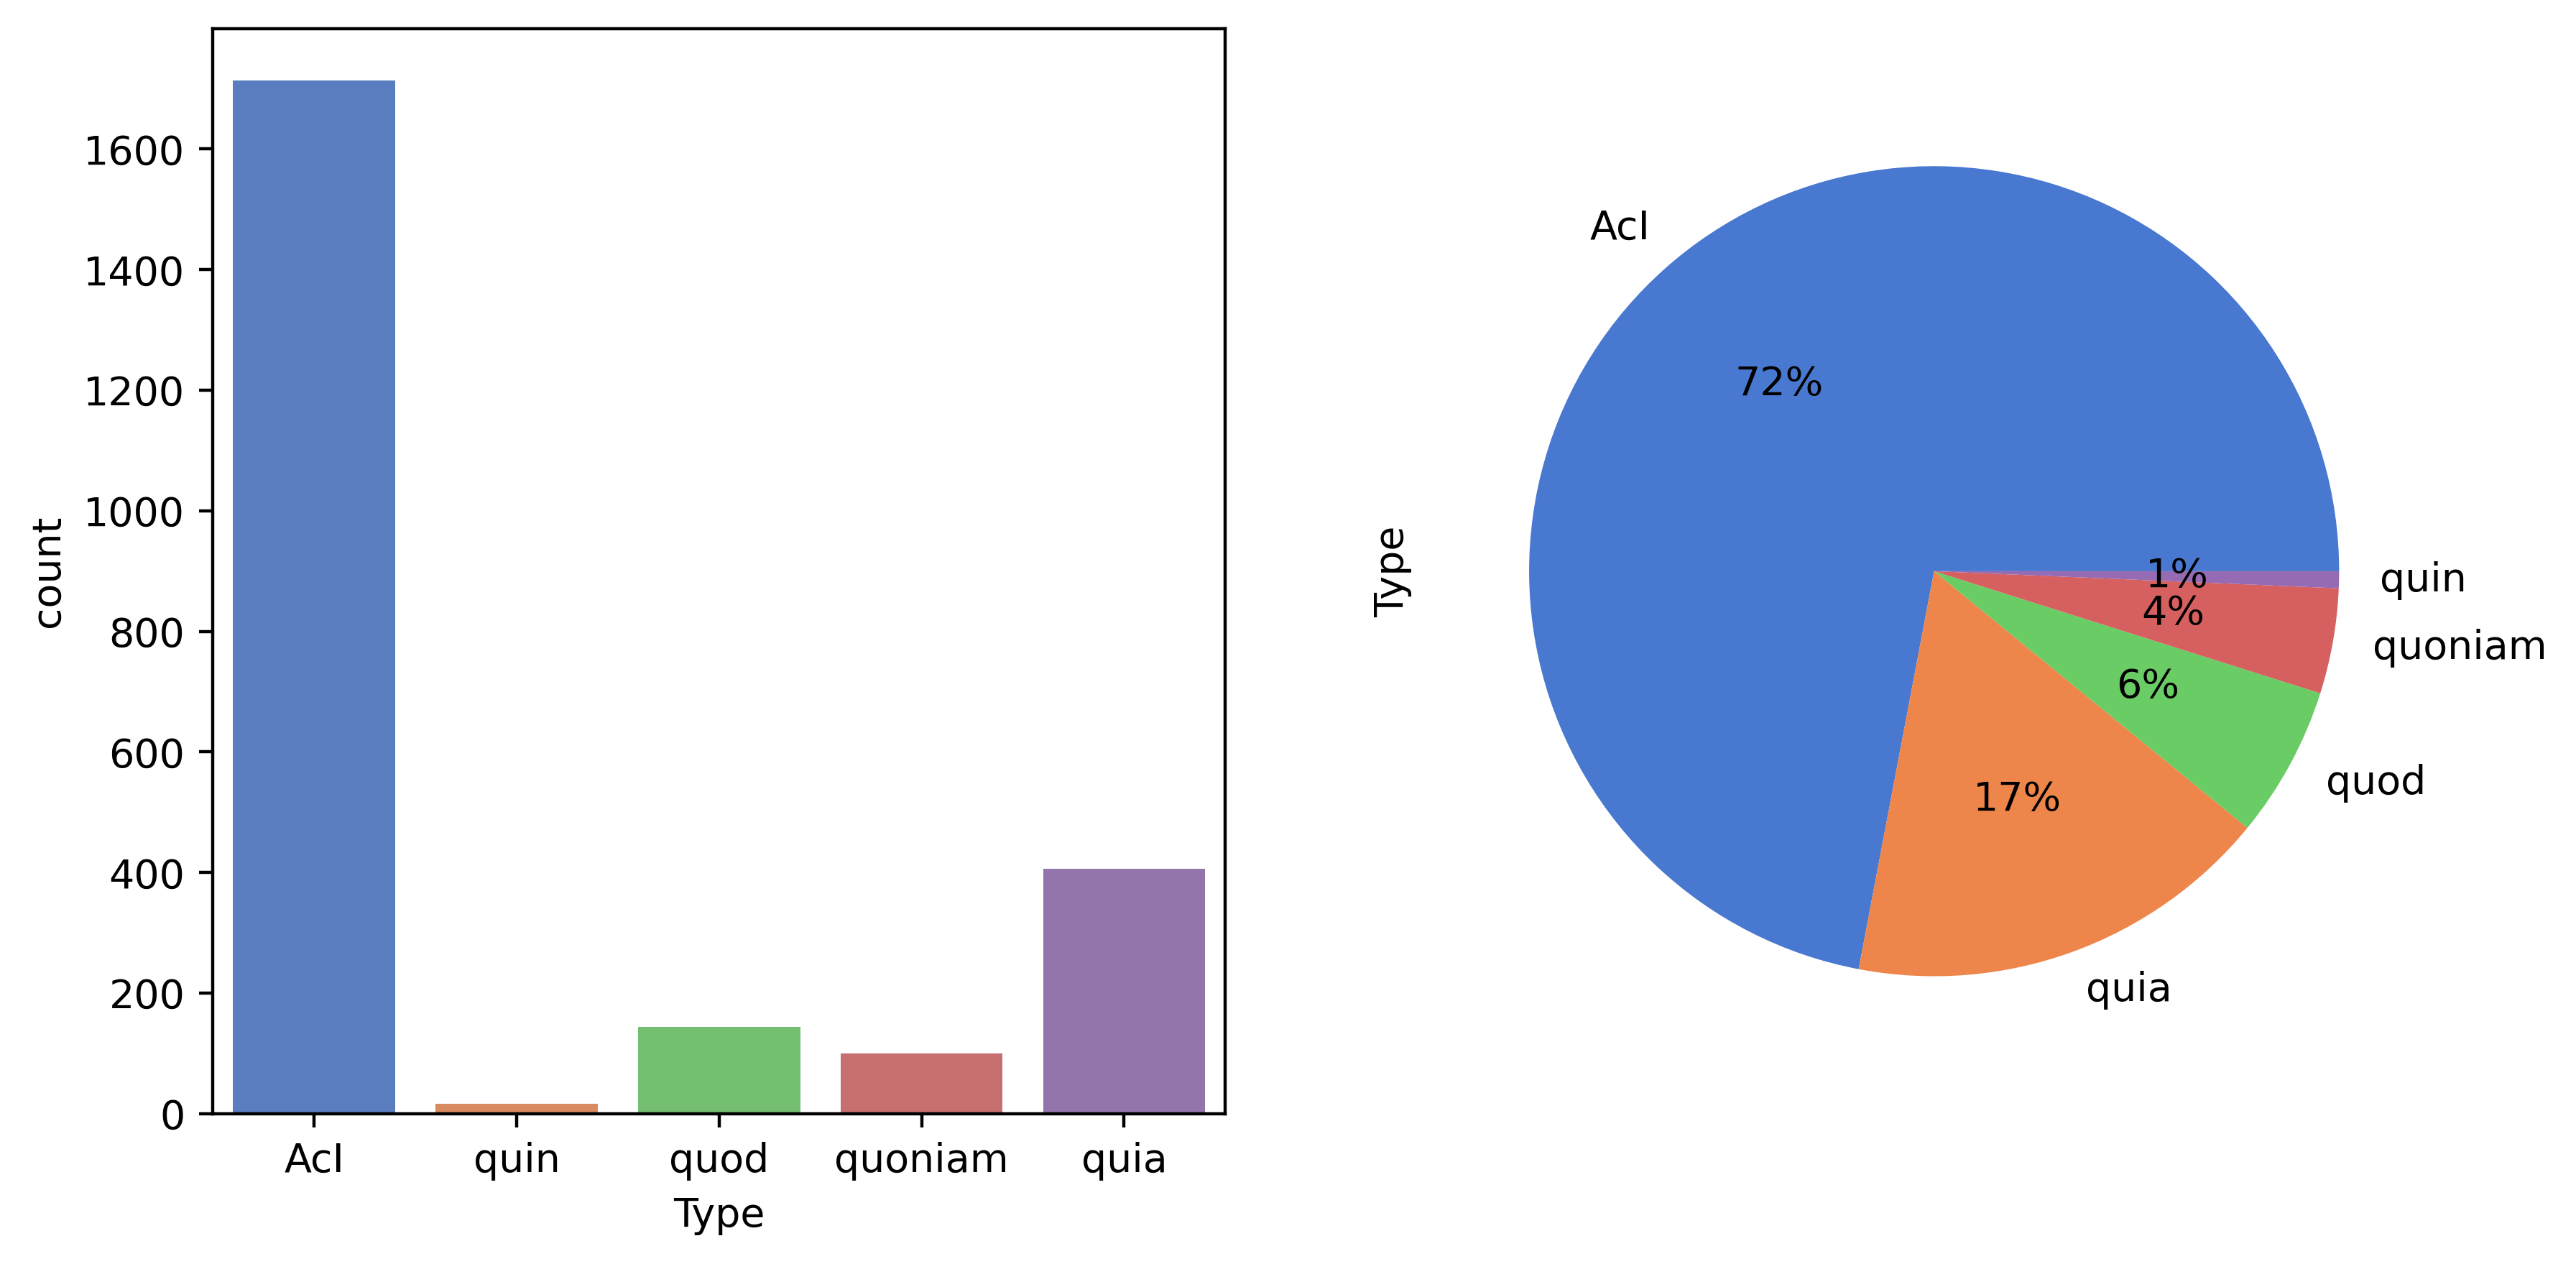

In [3]:
colors = sns.color_palette('muted')
fig, axes = plt.subplots(1, 2, figsize=(10,5), dpi=400, sharex=False, sharey=False)
sns.countplot(x='Type', data=df, ax=axes[0], palette='muted')
df['Type'].value_counts().plot.pie(ax=axes[1], autopct='%.0f%%', colors=colors)
# Colors don't match up - needs fixed

The data shows that *quia* is the most common conjunction for introducing indirect speech, and *quīn* the least.

Next, we'll see how frequency correlates with era.

<AxesSubplot:xlabel='Era', ylabel='count'>

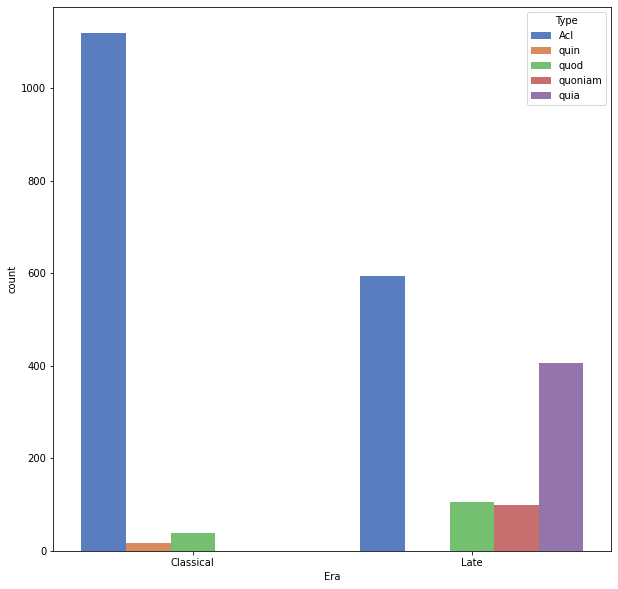

In [4]:
plt.figure(figsize=(10,10))
sns.countplot(x='Era', hue='Type', data=df, palette='muted')

We can see that for both eras, the accusative + infinitive structure is most common.
However, the Late texts show an increase in the amount and types of other structures, with *quia* and *quoniam* not being used as subordinators in Classical.

<AxesSubplot:xlabel='Author', ylabel='count'>

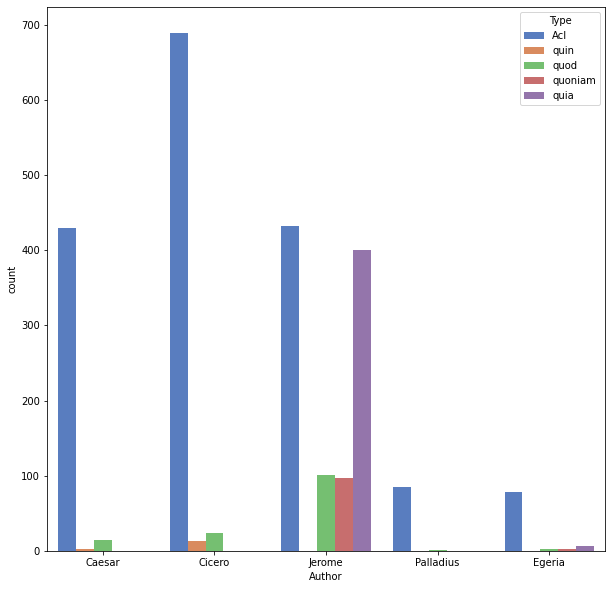

In [5]:
plt.figure(figsize=(10,10))
sns.countplot(x='Author', hue='Type', data=df, palette='muted')

Jerome uses conjunctions the most, as well as the greatest variation in type.
In fact, Jerome has significantly more.
This, however, could be due to a few factors.
First, Jerome's text is the entirety of the New Testament - a very long document.
Another possibility is that since it is a translation from Greek - Jerome was known to try to preserve the original syntax as much as possible - it may not reflect a wholly Latin development.
Looking at some of the original Greek, it seems that the use of subordinator *ὅτι* is translated with a Latin subordinator, not necessarily the same each time; in Matthew 2:16 it is translated with *quoniam* and in 2:22 with *quod*.
It also seems that, like Latin, Greek has more than one conjunction; the *quoniam* in Matthew 3:9 reflects Greek *γᾰ́ρ*.

Since Jerome's use may be motivated by translation concerns, it may be necessary to do more research into if it is purely due to his translation style or reflects a genuine change in Latin.